# **Model Evaluation and Hyperparameter Tuning using Titanic dataset**

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Load Dataset

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

#  Explore Dataset

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Visualize Missing Data

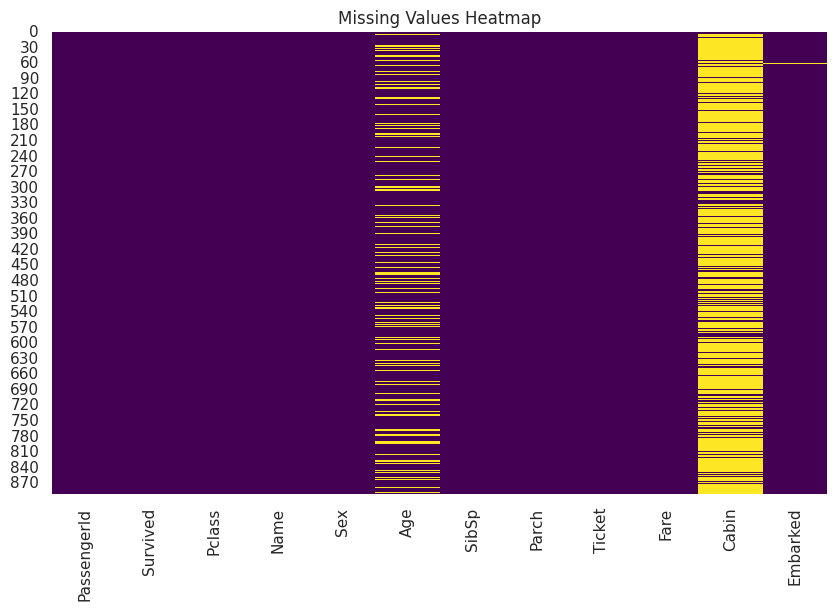

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Data Preprocessing

In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])        # male:1, female:0
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Spliting Features and Labels

In [7]:
X = df.drop('Survived', axis=1)
y = df['Survived']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training Evaluating Multiple Models


In [8]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

In [9]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, acc, prec, rec, f1])
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
results_df.sort_values(by="F1 Score", ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
2,Support Vector Machine,0.815642,0.815385,0.716216,0.762590
1,Random Forest,0.804469,0.767123,0.756757,0.761905
0,Logistic Regression,0.804469,0.782609,0.729730,0.755245
3,K-Nearest Neighbors,0.798883,0.771429,0.729730,0.750000
4,Decision Tree,0.782123,0.721519,0.770270,0.745098


# Visualizing Evaluation Metrics

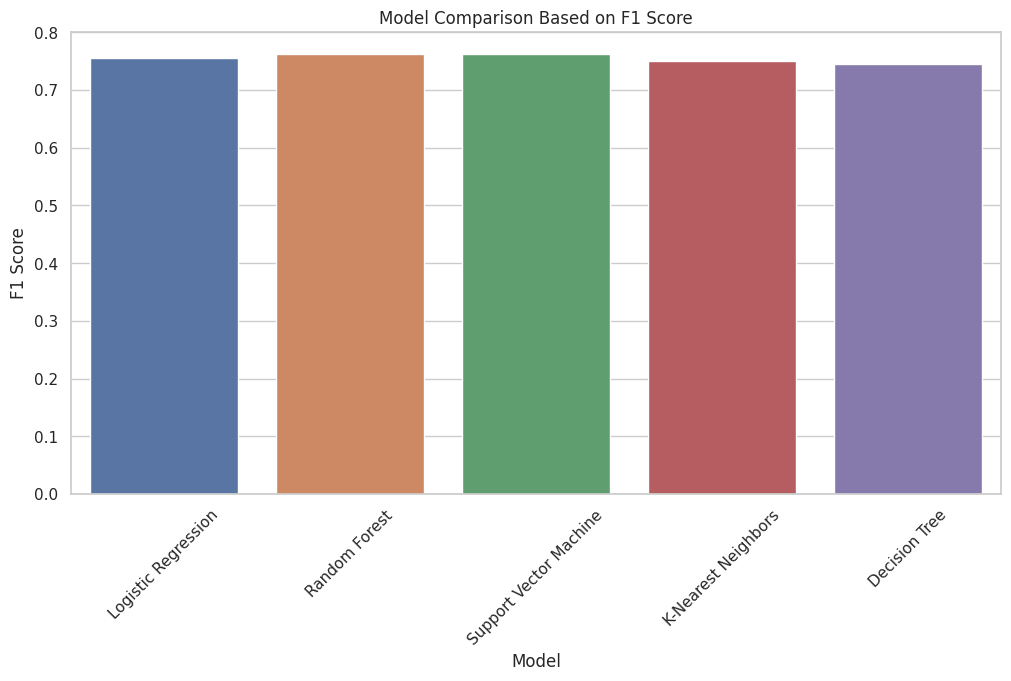

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1 Score', data=results_df)
plt.xticks(rotation=45)
plt.title("Model Comparison Based on F1 Score")
plt.show()

#  Hyperparameter Tuning (Random Forest - GridSearchCV)

In [11]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters (GridSearchCV):", grid_search.best_params_)

Best Parameters (GridSearchCV): {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


# Evaluating Tuned Model (GridSearchCV)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



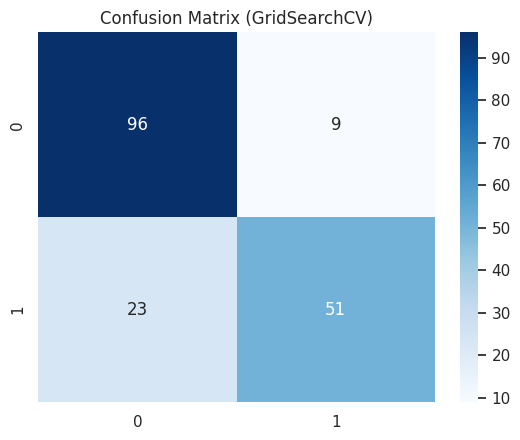

In [12]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (GridSearchCV)")
plt.show()

# RandomizedSearchCV (for SVC)

In [13]:
param_dist = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=10, scoring='f1', cv=5, random_state=42)
random_search.fit(X_train, y_train)
print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)

Best Parameters (RandomizedSearchCV): {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


# Evaluating Tuned Model (RandomizedSearchCV)

In [14]:
best_svc = random_search.best_estimator_
y_pred = best_svc.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



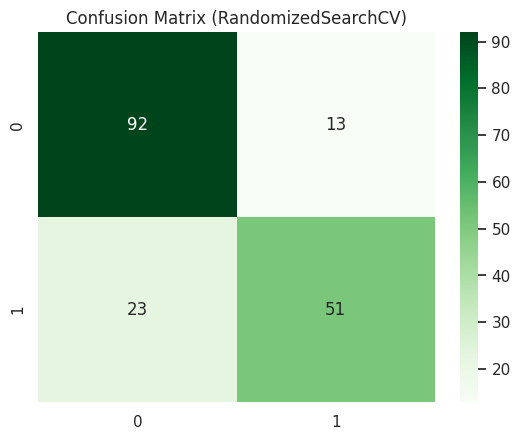

In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (RandomizedSearchCV)")
plt.show()

# Comparison of All Models

In [16]:
final_models = {
    "Logistic Regression": models["Logistic Regression"],
    "Random Forest (Tuned)": best_model,
    "SVM (Tuned)": best_svc
}
final_results = []
for name, model in final_models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    final_results.append([name, f1])
final_df = pd.DataFrame(final_results, columns=["Model", "F1 Score"]).sort_values(by="F1 Score", ascending=False)

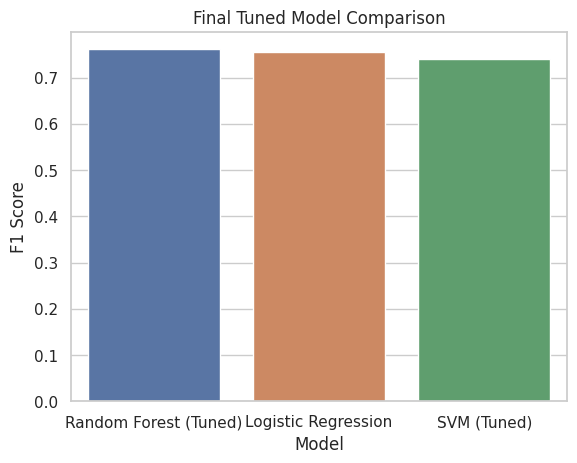

In [18]:
sns.barplot(x='Model', y='F1 Score', data=final_df)
plt.title("Final Tuned Model Comparison")
plt.show()